In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve,roc_auc_score,auc 
from sklearn import tree   
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_blobs
from   sklearn.cluster import AgglomerativeClustering, KMeans
import scipy.cluster.hierarchy as sch
from   scipy.cluster.hierarchy import dendrogram, linkage
from mlxtend.preprocessing import TransactionEncoder
supermarket = pd.read_csv("supermarket.csv", encoding="ISO-8859-1")
supermarket

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [2]:
supermarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [3]:
supermarket.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


<AxesSubplot:xlabel='cogs', ylabel='Rating'>

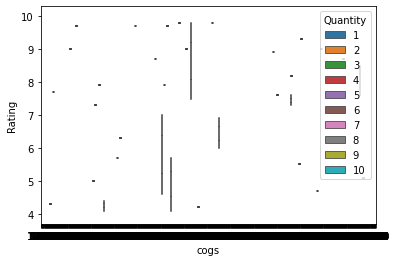

In [4]:
import seaborn as sns
sns.boxplot(data=supermarket, x='cogs', y='Rating', hue ='Quantity')

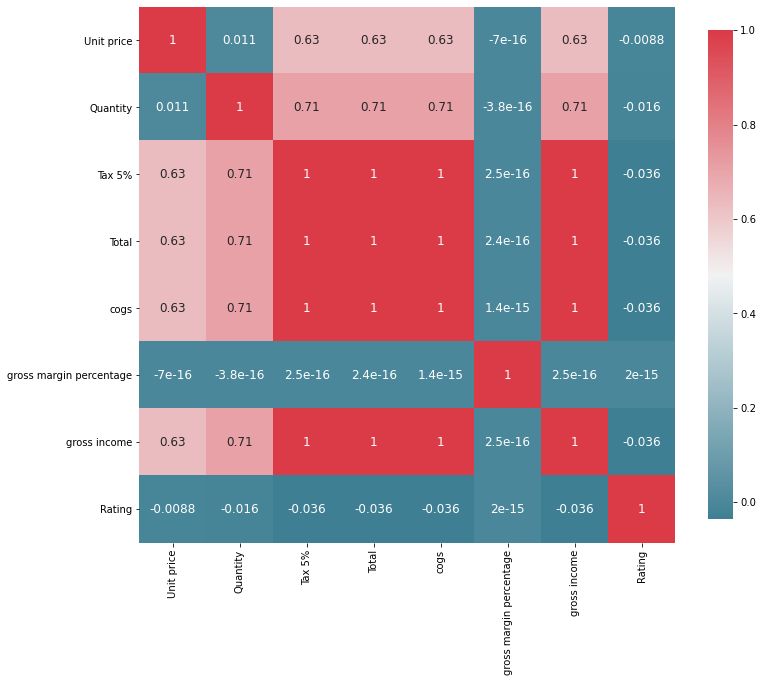

In [8]:
def plot_correlation_map( supermarket ):

    corr = supermarket.corr()

    s , ax = plt.subplots( figsize = (12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
    
plot_correlation_map(supermarket)

In [9]:
supermarket[["Tax 5%","Unit price","Quantity"]].groupby(["Quantity"], as_index=True).mean()

,Tax 5%,Unit price
Quantity,,
1,2.739094,54.781875
2,5.753429,57.534286
3,8.508833,56.725556
4,11.030110,55.150550
5,12.629044,50.516176
6,16.742082,55.806939
7,20.384995,58.242843
8,22.586165,56.465412
9,25.250234,56.111630


In [18]:
from sklearn.model_selection import train_test_split
X=supermarket[['Unit price']]
y=supermarket['Total']
X_train, X_test,y_train,y_test =train_test_split(X,y, test_size=0.20, random_state=30)

In [19]:
len(X_test)

200

In [20]:
len(X_train)

800

In [21]:
X_train

,Unit price
795,27.18
341,55.97
217,94.64
856,21.12
604,51.89
...,...
500,73.97
813,95.15
941,99.82
421,84.05


In [22]:
model=LinearRegression()   
model.fit(X_train,y_train)  
predicted=model.predict(X_test) 

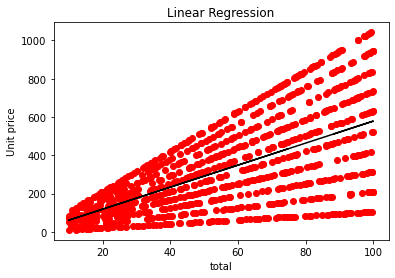

In [23]:
plt.scatter(X,y,color="r")
plt.title("Linear Regression")
plt.ylabel("Unit price")
plt.xlabel("total")
plt.plot(X,model.predict(X),color="k")
plt.show()

In [24]:
x=supermarket[['cogs','gross income']]
y=supermarket["Quantity"]
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  

logreg = LogisticRegression()   
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)    
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.26


/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

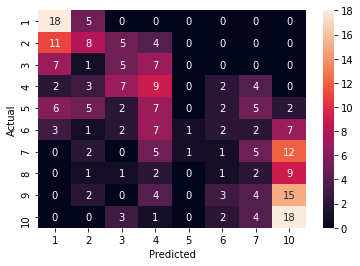

In [25]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [26]:
x = supermarket.iloc[:,0:-1].values
y=supermarket.iloc[:,-1].values


In [27]:
tree1 = tree.DecisionTreeClassifier()  
tree1.fit(x_train, y_train)   
y_pred=tree1.predict(x_test)  
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.232


In [28]:
import sklearn
print(sklearn.__version__)

0.23.2


In [29]:
tree2 = tree.DecisionTreeClassifier(criterion="gini",splitter='random',max_leaf_nodes=10,min_samples_leaf=5, max_depth=5)  
tree2.fit(x_train, y_train)   
y_pred=tree2.predict(x_test)  
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.288


In [30]:
clf=RandomForestClassifier(n_estimators=10)  
clf.fit(x_train, y_train)  
y_pred=clf.predict(x_test) 
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.232


In [31]:
supermarket.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [32]:
supermarket.drop(columns=['Date'])

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,15:33,Cash,65.82,4.761905,3.2910,4.1


In [34]:
tree1 = tree.DecisionTreeClassifier()  
tree1.fit(x_train, y_train)   
y_pred=tree1.predict(x_test)  
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.232
